<div style="background-color: #004B87; padding: 20px; border-radius: 10px;">
    <img src="https://cdn-assets-us.frontify.com/s3/frontify-enterprise-files-us/eyJwYXRoIjoibWlsbGltYW5cL2ZpbGVcL2l3dHhYOHJqV3pVUUV0R3hLc0FGLnN2ZyJ9:milliman:1F1qJpvDxGMTndryYS7nEiCYPRFCCi7l2rEhgnpdkGo?width=2400" width="300" height="150" alt="SVG Image" />
    <center>
        <h1 style="color:#FFFFFF;">IABE Data Science Certificate - Module 2 - Session 6</h1>
    </center>
    <center>
        <h2 style="color:#FFFFFF;">Programming: Boosting algorithms</h2>
    </center>
    <center>
        <h2 style="color:#FFFFFF;">27th March, 2025</h2>
    </center>
    <center>
        <h2 style="color:#FFFFFF;"></h2>
    </center>
</div>

# 1. Introduction<a name="introduction"></a>
  
Welcome to the third programming session of the second module of the Actuarial Data Scientist training program. This class continues a series of twelve practical sessions divided into three main modules. These presentations aim to concretely illustrate how a variety of data science techniques can be applied in an actuarial context.
<br />
<br />
This session will finish a succession of three sessions focused on decision trees and its extensions (e.g. bagging, random forest, gradient boosting). The session will start by introducing how a standard boosting algorithm works. Afterwards, the focus will shift to two well-known algorithms: Adaptive Boosting (Adaboost) and Extreme Gradient Boosting (XGBoost). The notebook will showcase how hyperparameters should be fine-tuned, and delve upon the interpretability of such models.   

To illustrate the session, a dataset containing fraud data is first introduced (classification example). Subsequently, the French MTPL dataset on frequency of motor insurance claims, which has already been used in previous sessions, will be considered (regression example).

## Objectives


## Table of Contents
1. [Introduction](#introduction)<br />
2. [Overview](#overview)<br />
    2.1. [Boosting algorithm](#boost_alg)<br />
    2.2. [AdaBoost](#ada_boost)<br />
    2.3. [Gradient Boosting](#gradient_boost)<br />
3. [Libraries and Setup](#loading_packages)
4. [Data Loading](#data_loading)
5. [Practical case #1: Fraud detection](#fraud_detection)<br />
    5.1 [Exploratory Data Analysis (EDA)](#Ex1_exploratory_data_analysis_(EDA))<br />
    5.2 [Data Cleaning and Preprocessing](#Ex1_data_cleaning_and_preprocessing)<br />
    5.3 [Modeling with Boosted Methods](#modeling_with_ensemble_methods)<br />
    5.4 [Model Evaluation](#Ex1_model_evaluation)<br />
    5.5 [Visualization of Results](#visualization_of_results)<br />
6. [Practical case #2: Claims severity](#frequency_data)<br />
    6.1 [Exploratory Data Analysis (EDA)](#Ex2_exploratory_data_analysis_(EDA))<br />
    6.2 [Data Cleaning and Preprocessing](#Ex2_data_cleaning_and_preprocessing)<br />
    6.3 [Gradient boosting with XGboost](#gradient_boosting_with_XGboost)<br />
    6.4 [Model Evaluation](#Ex2_model_evaluation)<br />
    6.5 [Objective comparison](#objective_comparison)<br />
    6.6 [Selection number of iterations & learning rate](#selection_number_of_iterations)<br />
    6.7 [Regularization](#regularization)<br />
    6.8 [Algorithm efficiency](#algorithm_efficiency)<br />
7. [Summary](#summary)

## Speakers

**Bjorn Blom**
<br />
Bjorn Blom is a consultant with 6+ years of experience in data science, process optimization and modelling in the insurance sector.
<br />
Mail address: bjorn.blom@milliman.com

**Daniël Van Dam**
<br />
Daniël is a consultant with 9+ years of experience in the financial sector, with experience in AI and data science.
<br />
Mail address: daniel.vandam@milliman.com


## Resources
<ins>**Books**</ins>
<br />
<br />
Denuit, Michel & Hainaut, Donatien & Trufin, Julien, 2020.
Effective Statistical Learning Methods for Actuaries II : Tree-Based Methods and Extensions, Université catholique de Louvain, ISBA.
<br />
Hastie, T., Tibshirani, R.,, Friedman, J. (2009). The elements of statistical learning: data mining, inference and prediction. Springer.
<br />
James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: With applications in python (2023rd ed.). New York, NY: Springer.
<br />
<br />

<ins>**Datasets**</ins>
1. [US Insurance Claims - Fraud Detection](https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data)<br />
2. [French MTPL frequency dataset](https://www.kaggle.com/datasets/floser/french-motor-claims-datasets-fremtpl2freq)

# 2. Overview <a name="overview"></a>
## 2.1 Boosting algorithm<a name="boost_alg"></a>

<ins>**Introduction**</ins><br /><br />
Boosting is a popular ensemble learning method that can be applied for numerous statistical learning methods, be it for regression or classification purposes. A boosting algorithm consists of iteratively combining multiple weak learners to create a strong predictive model. Rather than fitting one very large tree or applying regression on numerous variables, a boosting algorithm relies on simplified models and learns incrementally. Boosting is thus fundamentally different from random forests or bagging algorithms.

This method can reduce overfitting and provide great accuracy when hyperparameters are correctly fine-tuned. Boosting algorithms, particularly XGBoost, are known to be popular choices in data science contests. They offer good predictive accuracy, efficiency, flexibility, and handle non-linear relationships well. 

<ins>**Methodology**</ins><br /><br />
A boosting method is an additive model, meaning outcomes can be represented as a combination of different variables. An additive model is a generalized form of the standard linear regression. It can be represented as

$$E[Y \mid X]=\mu(X)=\sum_{j=1}^T f_j\left(X_j\right)$$

where $Y$ is the target variable, $X$ represents the explanatory variables and $f_1,...f_T$ different functions. This can be further detailed as

$$
\mu(X)=\sum_{t=1}^T f_t(X)=\sum_{t=1}^T \beta_{t, \mathbf{a}_t} h\left(X ; \mathbf{a}_t\right).
$$

Within this equation:

- $h\left(X ; \mathbf{a}_t\right)$ is a simple function characterized by a set of parameters $\mathbf{a}_t$, called weak learner
- $\beta_{t, \mathbf{a}_t} h\left(X ; \mathbf{a}_t\right)$ is the individual fitted weak learner $t$
- The outcome $\mu(X)$ is calculated as a combination of individual weak learners

In this model, individual weak learners are fitted iteratively and added to previous ones. Previously fitted weak learners are retained and not recalculated.

<ins>**Overview of a standard boosting model:**</ins>
1. Initialize $\hat{\mu}_{0} = 0$<br />
2. Loop for $t=1$ to $T$ iterations:<br />
    2.1. Estimate $\mathbf{a}_t$ and $\beta_{t, \mathbf{a}_t} h\left(X ; \mathbf{a}_t\right)$ by minimizing the loss function: $\sum_{i \in \mathcal{I}} L\left(y_i, \hat{\mu}_{t-1}\left(x_i\right)+\beta_{t, \mathbf{a}_t} h\left(x_i ; \mathbf{a}_t\right)\right)$.<br />
    2.2. Adjust the previous prediction with the latest fitted weak learner: $\hat{\mu}_t(x)=\hat{\mu}_{t-1}(x)+\tau \ \hat{\beta}_{t, \mathbf{a}_t} h\left(x ; \mathbf{a}_t\right)$.
3. $\hat{\mu}^{\text{boost}}(x)=\hat{\mu}_T(x)$

As demonstrated in the theoretical session, individual weak learners are fitted based on residuals from their previous iteration. Above, $0 < \tau \leq 1$ represents a shrinkage factor (also called learning rate) that typically ranges between 0.001 and 0.5. A lower $\tau$ will slow the learning rate of the model. reduces the impact of noises, and diminishes overfitting. However, it will also make the model more computationally intensive as extra iterations will be required. 

Another limitation of the standard boosting model concerns the estimation of weak learners. Finding simultaneously the set of parameter $\mathbf{a}_t$ of function $h\left(X ; \mathbf{a}_t\right)$, and the related coefficients $\beta_{t, \mathbf{a}_t} h\left(X ; \mathbf{a}_t\right)$ that minimize the loss function can be difficult to achieve.

## 2.2 AdaBoost<a name="ada_boost"></a>
Adaboost is an alternative boosting classifier method not covered by the theoretical lecture. The primarily objective of this method is to iteratively concentrate on instances that are misclassified to improve the model. The standard weak learners and output values of this model are either -1 or 1.

<ins>**Overview of an AdaBoosting model:**</ins>
1. Initialize $\hat{\mu}_{0} = 0$ and set equal weights for each instance with $w_{i} = \frac{1}{n}$<br />
2. Loop for $t=1$ to $T$ iterations:<br />
    2.1. Find the weak learner $h_t\left(X; \mathbf{a}_t\right)$ minimizing the weighted exponential loss function<br />
    2.2. Compute error term $\epsilon_{t}=\frac{\sum_{i \in \mathcal{I}} w_{i} \cdot 1\left(y_{i} \neq h_t\left(x_i ; \mathbf{a}_t\right)\right)}{\sum_{i \in \mathcal{I}} w_{i}}$<br />
    2.3. Compute $\mathbf{a}_t=\frac{1}{2} \ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right)$<br />
    2.4. Adjust the prediction with the latest fitted weak learner: $\hat{\mu}_t(x)=\hat{\mu}_{t-1}(x)+\tau \ \mathbf{a}_t h_t\left(X ; \mathbf{a}_t\right)$<br />
    2.5 Update weights $w_{i, t+1}=w_{i, t} e^{-y_i \mathbf{a}_t h_t\left(X ; \mathbf{a}_t\right)} \text { for } i \text { in } 1 \ldots n$ and normalize the weights so that they sum to 1.<br />
3. $\hat{\mu}^{\text{boost}}(x)=\hat{\mu}_T(x)$

In this model, the weights are updated to give more emphasis to the misclassified observations.

## 2.3 Gradient Boosting<a name="gradient_boost"></a>
Gradient Boosting is an enhancement to the regular boosting algorithm. As previously mentioned, minimizing the loss function can be tedious due to the different parameters and coefficients that must be estimated. 

The gradient boosting method provides an efficient solution to tackle this issue. The algorithm procedure now estimates $\mathbf{a}_t$ and $\beta_{t, \mathbf{a}_t} h\left(X ; \mathbf{a}_t\right)$ separately:

1. Pseudo residuals are computed as the negative gradients of the loss function while $\mu({x}_{i}) = \hat{\mu}_{t-1}({x}_{i})$. Using the same notation as the theoretical session, it is represented mathematically as<br /> <br />
$$r_i=-\left.\frac{\partial L\left(y_i, \mu\left(x_i\right)\right)}{\partial \mu\left(x_i\right)}\right|_{\mu\left(x_i\right)=\hat{\mu}_{t-1}\left(x_i\right)}, \quad i \in \mathcal{I}.$$

2. The set of parameters $\mathbf{a}_t$ are then estimated by fitting the pseudo residuals as <br /><br />
$$\mathbf{a}_t=\underset{\mathbf{a}_t}{\operatorname{argmin}} \sum_{i=1}^{|\mathcal{I}|}\left(-r_i-h\left(x_i ; \mathbf{a}_t\right)\right)^2.$$

3. Similarly to the standard boosting algorithm, the fitted weak learner $\beta_{t, \mathbf{a}_t} h\left(X ; \mathbf{a}_t\right)$ can now be estimated by minimizing the loss function. Afterwards, the weak learner is combined once again

$$\hat{\mu}_t(x)=\hat{\mu}_{t-1}(x)+\tau \ \hat{\beta}_{t, \mathbf{a}_t} h\left(x ; \mathbf{a}_t\right)$$


Further explanations related to can be found [here](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent).


Note that different loss functions can be used. For instance the mean square error, poisson deviance, gamma deviance,...

# 3. Libraries and Setup<a name="loading_packages"></a>
Two main packages will be used to implement boosting models: ```sklearn``` and ```xgboost```. Additional packages are loaded to handle dataframes, compute specific metrics or visualize results. 

In [1]:
# Numerical and Data Manipulation Libraries
import numpy as np
import pandas as pd

# Machine Learning Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, GradientBoostingRegressor
import xgboost as xgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns


# Statistical Modeling Library
import statsmodels.api as sm

# Utility Libraries
import time

In [2]:
%matplotlib inline
sns.set(style="whitegrid")

# 4. Data Loading<a name="data_loading"></a>

For this session, we will use two datasets:

__US Insurance Claims Fraud__: This dataset contains information about insurance policies, including demographics and claim amounts. The dataset also records whether fraud has been reported.

__French MTPL frequency dataset__: freMTPL2freq includes data on 678,013 motor third-part liability policies in France. Its variables represent information on the number of claims (*ClaimNb*), the exposure, the characteristics of the vehicle and driver, as well as data on the geographical area. The variable of interest is the claims frequency, which is equal to the number of claims divided by the exposure.

In [97]:
# Load the dataset
df = pd.read_csv("insurance_claims.csv")
mtpl_freq = pd.read_csv("freMTPL2freq.csv")

# 5. Practical case #1: Fraud detection<a name="fraud_detection"></a>
## 5.1 Exploratory Data Analysis (EDA)<a name="Ex1_exploratory_data_analysis_(EDA)"></a>

Let's explore the dataset to understand its structure and identify any patterns or anomalies.

In [6]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Dataset information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Statistical summary

In [8]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,2006-01-01,OH,250/500,NaN,NaN,NaN,NaN,...,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


C:\Users\bjorn.blom\AppData\Local\Temp\ipykernel_5736\2629664613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraud_reported', palette='coolwarm')


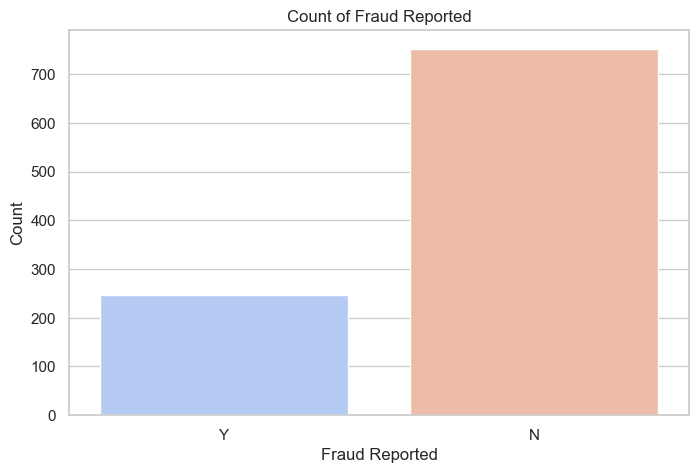

In [9]:
# Count Plot of Fraud Reported
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='fraud_reported', palette='coolwarm')
plt.title('Count of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

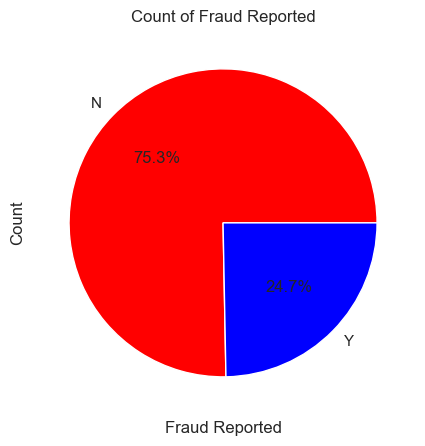

In [15]:
# Count Plot of Fraud Reported
fraud_counts = df.groupby('fraud_reported').size()
plt.figure(figsize=(8, 5))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['red','blue'])
plt.title('Count of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

C:\Users\bjorn.blom\AppData\Local\Temp\ipykernel_9036\243995990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='incident_severity', palette='Set2')


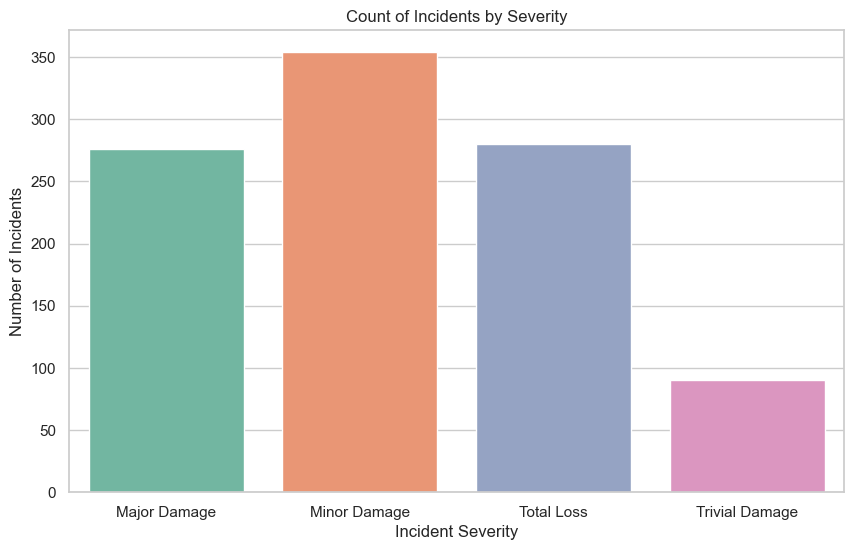

In [9]:
# Bar Plot of Incident Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='incident_severity', palette='Set2')
plt.title('Count of Incidents by Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Number of Incidents')
plt.show()

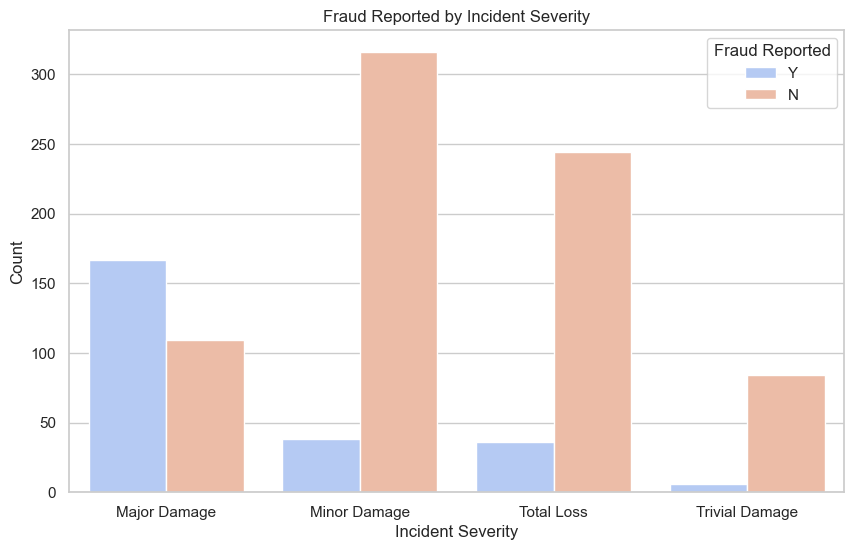

In [10]:
# Bar Plot of Fraud Reported by Incident Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='incident_severity', hue='fraud_reported', palette='coolwarm')
plt.title('Fraud Reported by Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

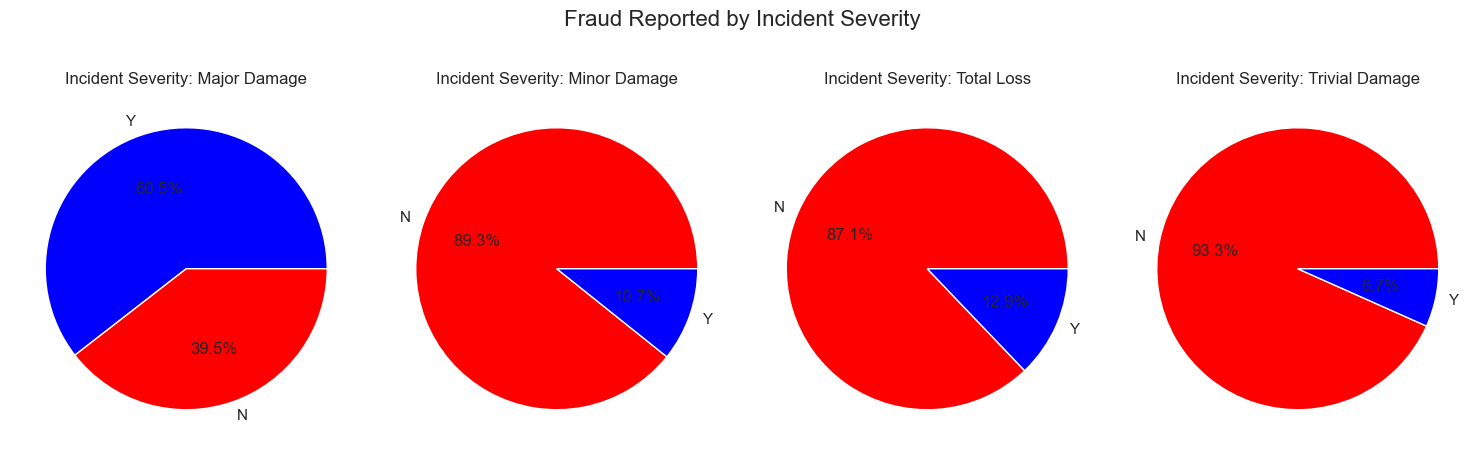

In [16]:
# Prepare data for pie charts
severity_levels = df['incident_severity'].unique()

# Define colors for 'No' and 'Yes' consistently
colors = {'N': 'red', 'Y': 'blue'}

# Create pie charts for each incident severity level
fig, axes = plt.subplots(1, len(severity_levels), figsize=(15, 5))
fig.suptitle('Fraud Reported by Incident Severity', fontsize=16)

for i, severity in enumerate(severity_levels):
    # Filter data for the current severity level
    severity_data = df[df['incident_severity'] == severity]['fraud_reported'].value_counts()

    # Ensure colors are consistent
    chart_colors = [colors.get(label, 'grey') for label in severity_data.index]

    # Create pie chart
    axes[i].pie(severity_data, labels=severity_data.index, autopct='%1.1f%%', colors=chart_colors)
    axes[i].set_title(f'Incident Severity: {severity}')

plt.tight_layout()
plt.show()


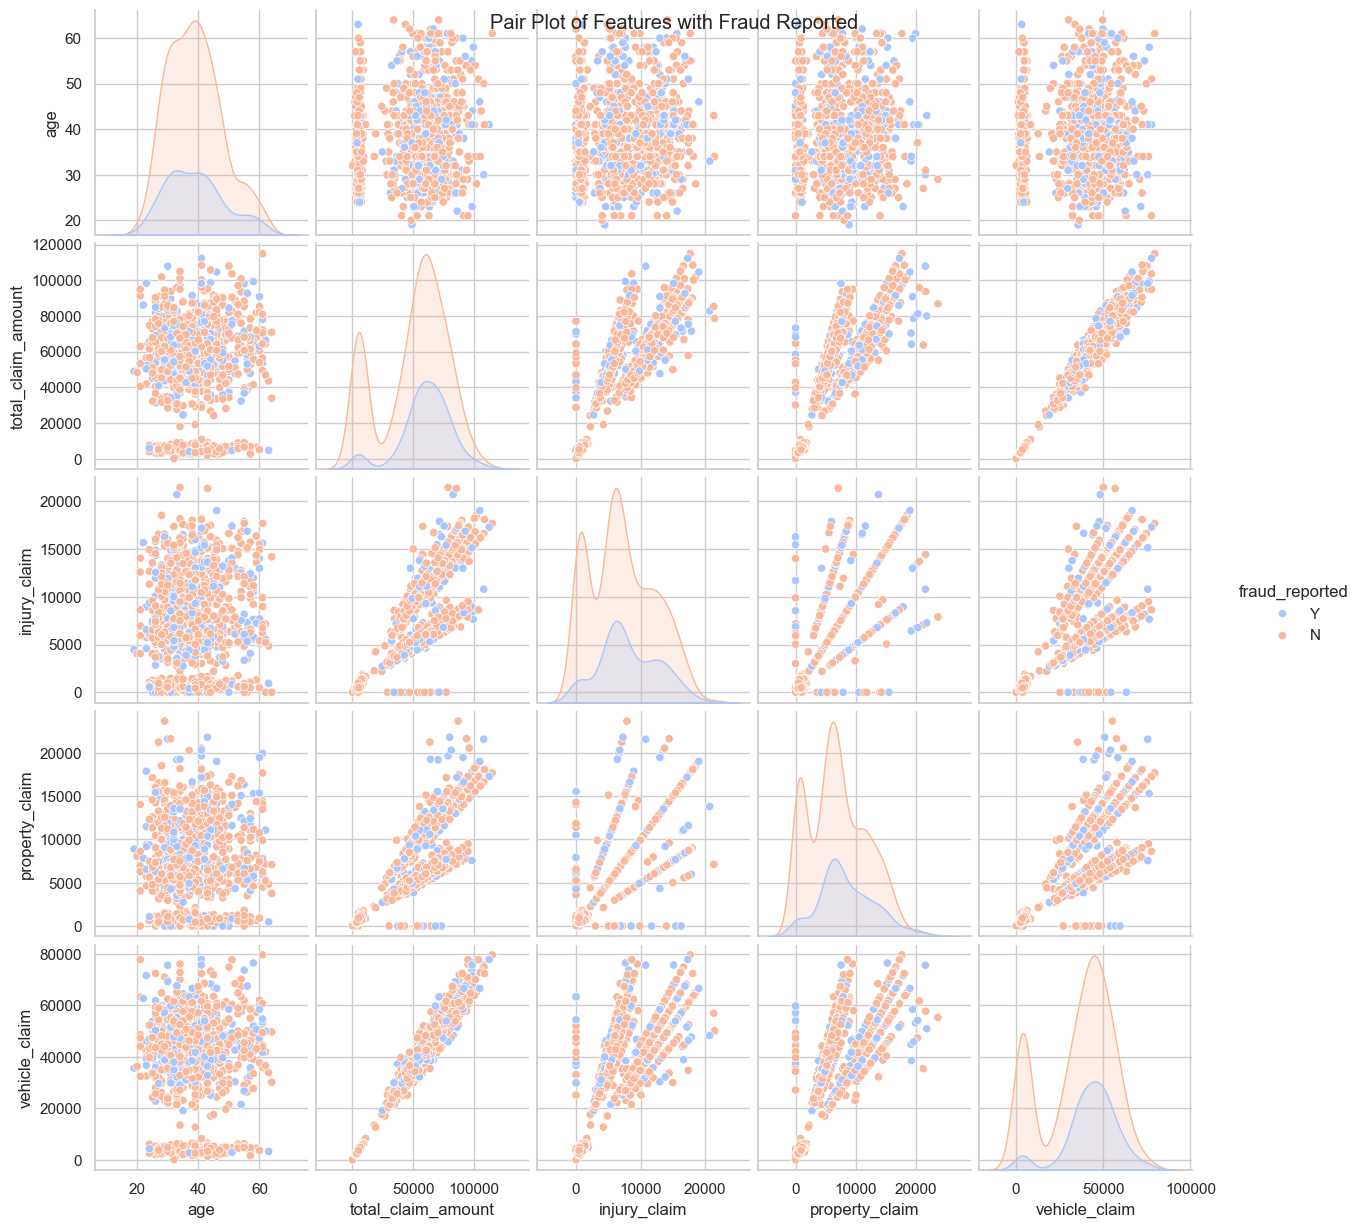

In [12]:
# Pair Plot of Selected Features with Fraud Reported as Hue
sns.pairplot(df[['age', 'total_claim_amount','injury_claim','property_claim','vehicle_claim', 'fraud_reported']], 
             hue='fraud_reported', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Features with Fraud Reported')
plt.show()

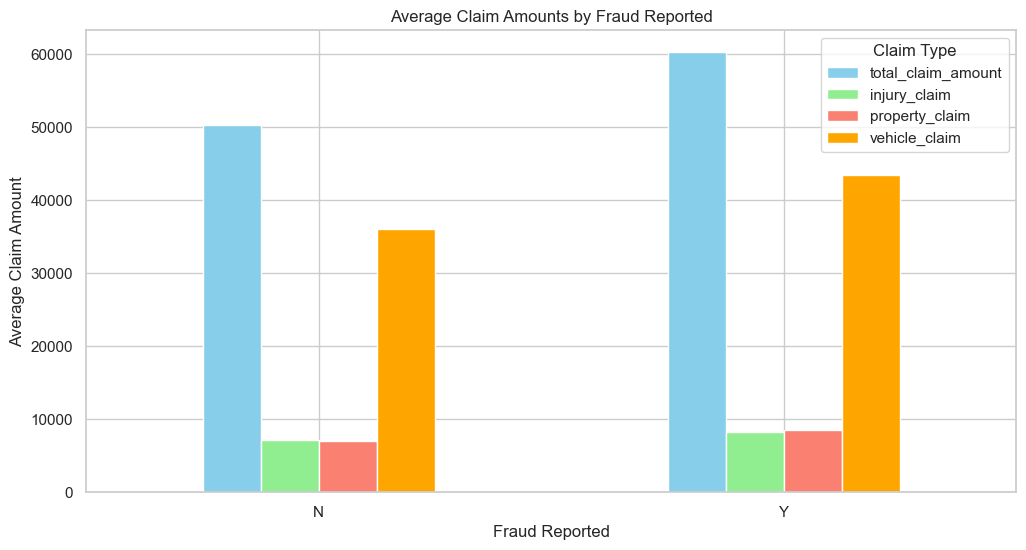

In [34]:
# Calculate average claim amounts grouped by fraud reported status
avg_claims = df.groupby('fraud_reported')[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
avg_claims.set_index('fraud_reported').plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen', 'salmon', 'orange'], ax=plt.gca())
plt.title('Average Claim Amounts by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=0)
plt.legend(title='Claim Type')
plt.show()

## 5.2 Data Cleaning and Preprocessing<a name="Ex1_data_cleaning_and_preprocessing"></a>

Prepare the data for modeling by encoding categorical variables

### Encode categorical variables using one-hot encoding

In [35]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [36]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [37]:
df2 = df.drop(columns=['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'incident_date', 'incident_location', 'auto_model', 'auto_make', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_city', 'incident_state', '_c39'],axis=1)
df2.head(5)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,53300,0,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,0,0,...,?,0,0,?,5070,780,780,3510,2007,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,35100,0,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,48900,-62400,...,?,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,66000,-46000,...,NO,0,1,NO,6500,1300,650,4550,2009,N


Handle missing values if any

In [38]:
df2.ffill(inplace=True)

In [39]:
## Create dummy variables for categorical variables
df_encoded = pd.get_dummies(df2, drop_first=True)
df_encoded.head(5)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,fraud_reported_Y
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,False,False,False,False,True,False,True,False,True,True
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,False,False,False,False,True,False,False,False,False,True
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,False,False,False,False,True,True,False,True,False,False
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,False,False,False,False,True,False,False,True,False,True
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,False,False,False,False,True,True,False,True,False,False


### Extract features and target

In [40]:
target = 'fraud_reported_Y'
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

### Split the data into training and testing sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.3 Modeling with Boosted Methods<a name="modeling_with_ensemble_methods"></a>


## AdaBoost Classifier

In [50]:
base_estimator = DecisionTreeClassifier(max_depth=2)

# Initialize the AdaBoost classifier with the base estimator
ada_model = AdaBoostClassifier(base_estimator, random_state=42)
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(classification_report(y_test, y_pred_ada))

AdaBoost Performance:
Accuracy: 0.725
              precision    recall  f1-score   support

       False       0.78      0.86      0.82       145
        True       0.50      0.36      0.42        55

    accuracy                           0.72       200
   macro avg       0.64      0.61      0.62       200
weighted avg       0.70      0.72      0.71       200



c:\Users\bjorn.blom\Anaconda3\envs\aibe_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


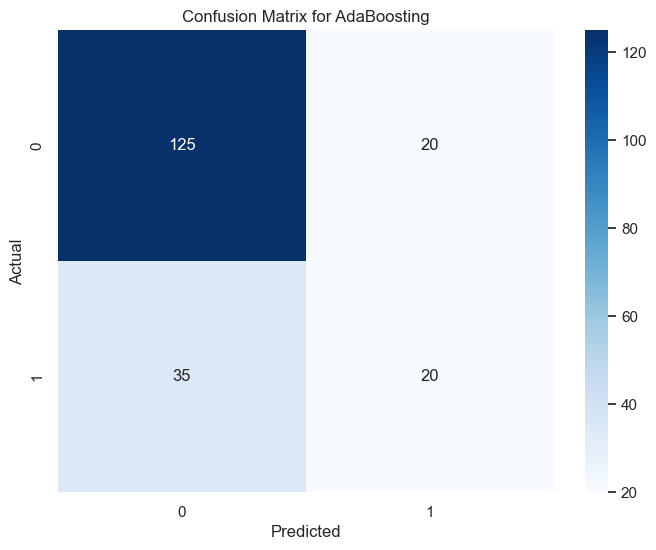

In [51]:
conf_matrix_gbm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for AdaBoosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Gradient Boosting Machine (GBM)

In [52]:
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Evaluate and interpret the model performance
y_pred_gbm = gbm.predict(X_test)
print("Gradient Boosting Machine (GBM) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbm)}")
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Machine (GBM) Performance:
Accuracy: 0.73
              precision    recall  f1-score   support

       False       0.77      0.90      0.83       145
        True       0.52      0.27      0.36        55

    accuracy                           0.73       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.70      0.73      0.70       200



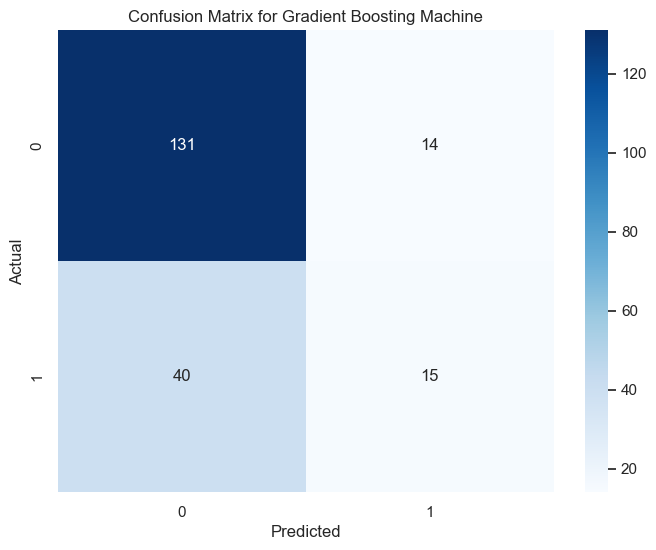

In [53]:
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost Classifier

In [54]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(seed=42)
xgb_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate and interpret the model performance
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Performance:
Accuracy: 0.71
              precision    recall  f1-score   support

       False       0.76      0.87      0.81       145
        True       0.46      0.29      0.36        55

    accuracy                           0.71       200
   macro avg       0.61      0.58      0.58       200
weighted avg       0.68      0.71      0.69       200



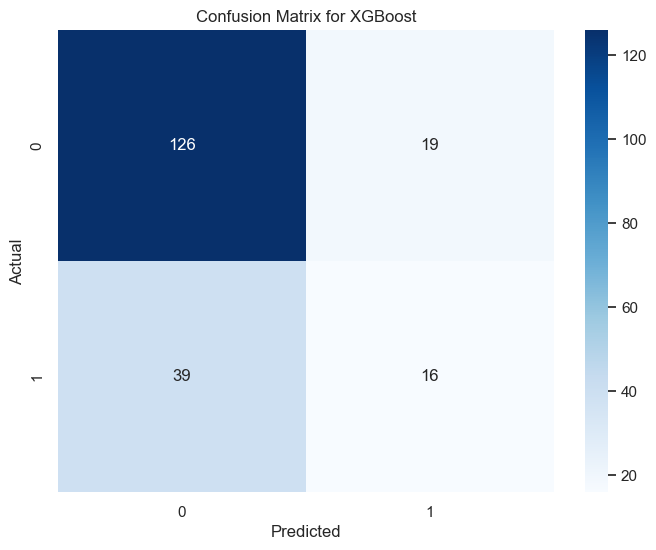

In [55]:
conf_matrix_gbm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.4 Model Evaluation<a name="Ex1_model_evaluation"></a>

### Comparison: Random Forest vs AdaBoost vs GBM vs XGBoost

### Random forest

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [57]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.715
              precision    recall  f1-score   support

       False       0.75      0.90      0.82       145
        True       0.46      0.22      0.30        55

    accuracy                           0.71       200
   macro avg       0.61      0.56      0.56       200
weighted avg       0.67      0.71      0.68       200



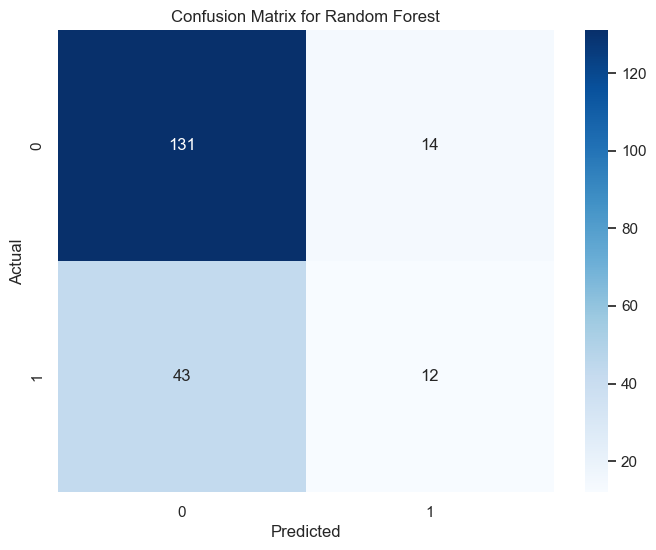

In [58]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Comparison

In [85]:
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting','XGBoost']
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_ada),
              accuracy_score(y_test, y_pred_gbm),
              accuracy_score(y_test, y_pred_xgb)]

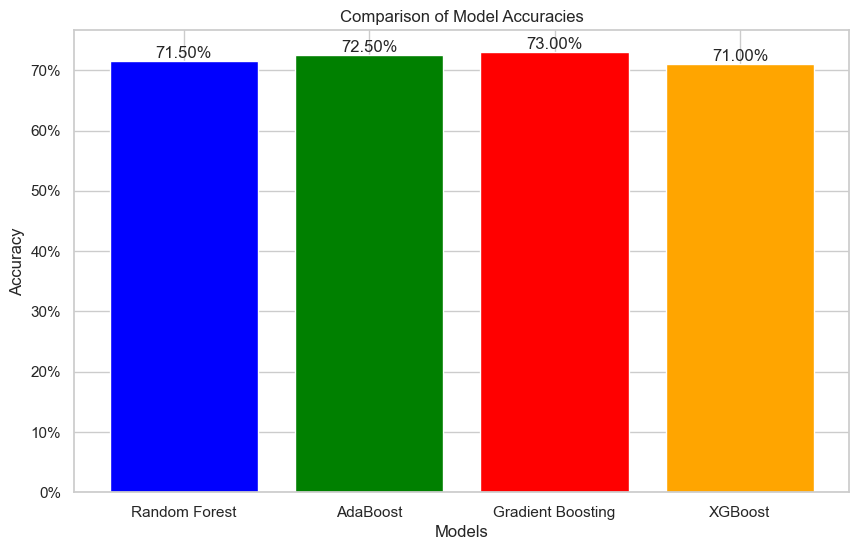

In [86]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{accuracy:.2%}', ha='center', va='bottom')
plt.show()

### Fraud only

In [87]:
y_fraud_only_test = y_test[y_test == True]

In [88]:
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting','XGBoost']
accuracies = [accuracy_score(y_fraud_only_test, y_pred_rf[y_test == True]),
              accuracy_score(y_fraud_only_test, y_pred_ada[y_test == True]),
              accuracy_score(y_fraud_only_test, y_pred_gbm[y_test == True]),
              accuracy_score(y_fraud_only_test, y_pred_xgb[y_test == True])]

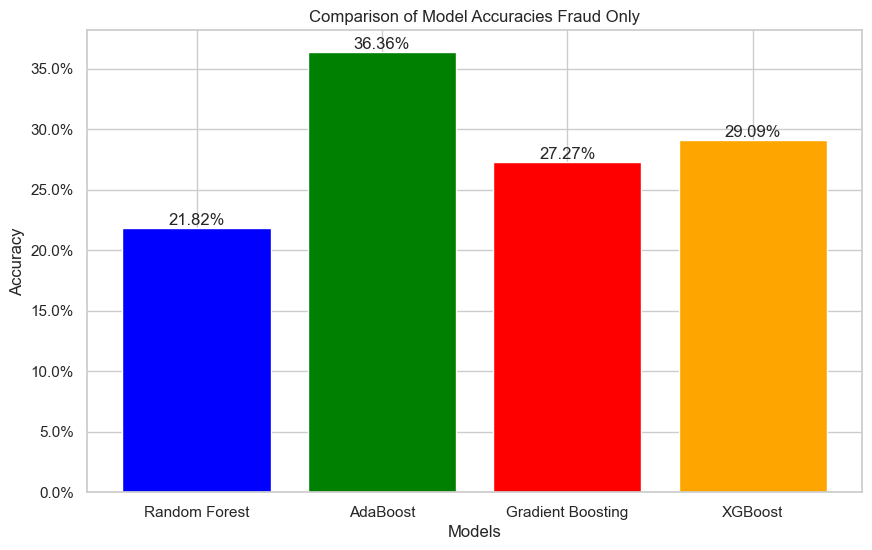

In [89]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Fraud Only')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{accuracy:.2%}', ha='center', va='bottom')
plt.show()

## 'Advanced' GBM (Model parameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000,2000],
    'learning_rate': [0.1, 0.3, 0.5], 
    'max_depth': [3, 10, 20],          
    'subsample': [0.01, 0.02, 0.1],    
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}

# Define a scoring function using F1-score
f1_scorer = make_scorer(f1_score, pos_label=True)

# Set up the grid search
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring=f1_scorer)

# Conduct the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [ ]:
best_model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.02,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

best_model.fit(X_train, y_train)
y_pred_bestmodel_gridsearch = best_model.predict(X_test)

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bestmodel_gridsearch)}")
print(classification_report(y_test, y_pred_bestmodel_gridsearch))


Test Set Performance:
Accuracy: 0.525
              precision    recall  f1-score   support

       False       0.72      0.57      0.63       145
        True       0.27      0.42      0.33        55

    accuracy                           0.53       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.60      0.53      0.55       200



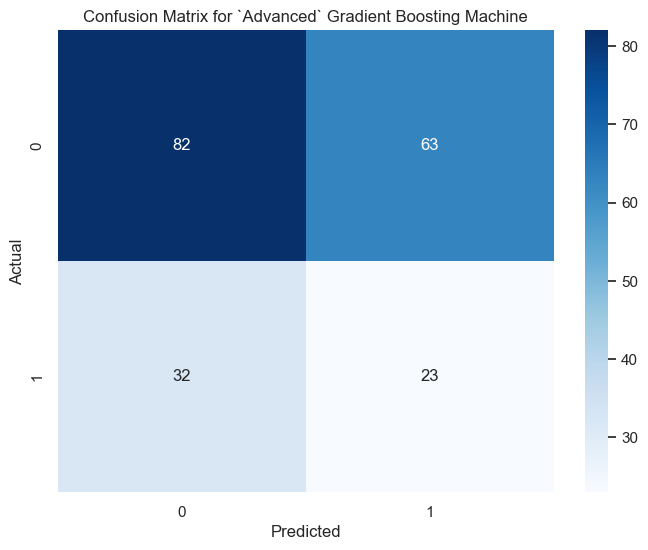

In [78]:
conf_matrix_gbm_gridsearch = confusion_matrix(y_test, y_pred_bestmodel_gridsearch)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm_gridsearch, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for `Advanced` Gradient Boosting Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting','XGBoost','Gradient Boosting (Gridsearch)']
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_ada),
              accuracy_score(y_test, y_pred_gbm),
              accuracy_score(y_test, y_pred_xgb),
              accuracy_score(y_test, y_pred_bestmodel_gridsearch)]

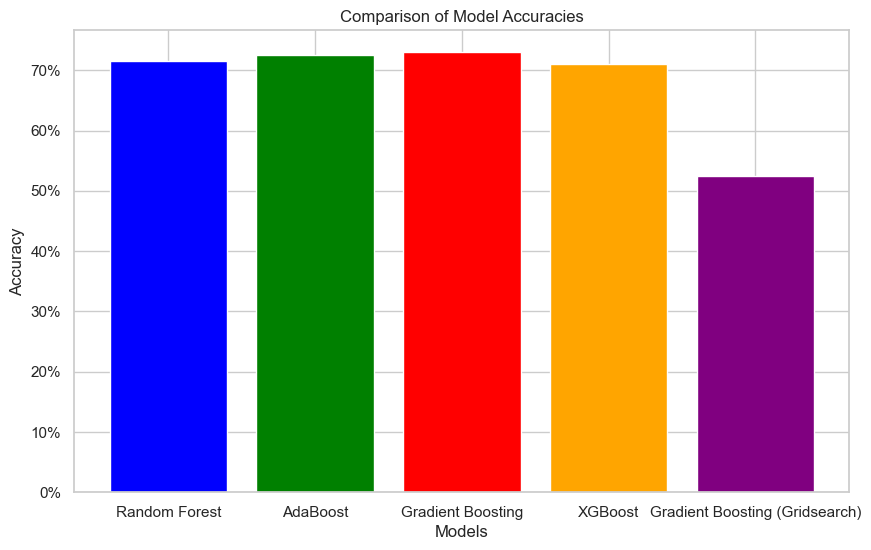

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red','orange','purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [93]:
accuracies = [accuracy_score(y_fraud_only_test, y_pred_rf[y_test == True]),
              accuracy_score(y_fraud_only_test, y_pred_ada[y_test == True]),
              accuracy_score(y_fraud_only_test, y_pred_gbm[y_test == True]),
              accuracy_score(y_fraud_only_test, y_pred_xgb[y_test == True]),
             accuracy_score(y_fraud_only_test, y_pred_bestmodel_gridsearch[y_test == True])]

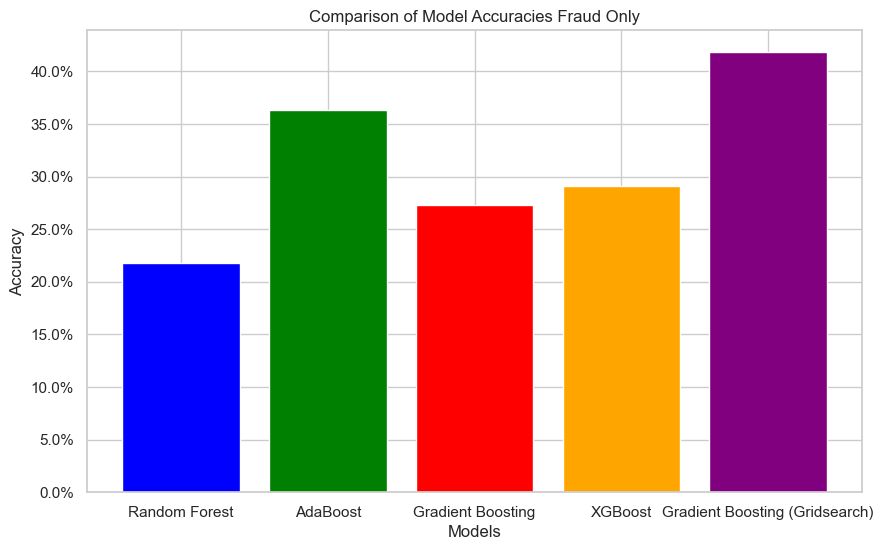

In [94]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red','orange','purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Fraud Only')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# 6. Practical case #2: Frequency data<a name="frequency_data"></a>
## 6.1 Exploratory Data Analysis (EDA)<a name="Ex2_exploratory_data_analysis_(EDA)"></a>
Let us return to a dataset introduced in Module 1 Session 4 on generalized linear model (GLM). The dataset freMTPL2freq contains data on 678,013 motor third-party liability policies in France. Its variables include information on the number of claims (*ClaimNb*), the exposure, the characteristics of the vehicle and driver, as well as data on the geographical area.

In [98]:
mtpl_freq.head(5)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [101]:
# Header of the dataset is printed
mtpl_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


In [102]:
mtpl_freq.describe(include='all')

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
count,6.780130e+05,678013.000000,678013.000000,678013,678013.000000,678013.000000,678013.000000,678013.000000,678013,678013,678013.000000,678013
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,11,2,NaN,22
top,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,B12,Regular,NaN,R24
freq,NaN,NaN,NaN,191880,NaN,NaN,NaN,NaN,166024,345877,NaN,160601
mean,2.621857e+06,0.053247,0.528750,NaN,6.454631,7.044265,45.499122,59.761502,NaN,NaN,1792.422405,NaN
std,1.641783e+06,0.240117,0.364442,NaN,2.050906,5.666232,14.137444,15.636658,NaN,NaN,3958.646564,NaN
min,1.000000e+00,0.000000,0.002732,NaN,4.000000,0.000000,18.000000,50.000000,NaN,NaN,1.000000,NaN
25%,1.157951e+06,0.000000,0.180000,NaN,5.000000,2.000000,34.000000,50.000000,NaN,NaN,92.000000,NaN
50%,2.272152e+06,0.000000,0.490000,NaN,6.000000,6.000000,44.000000,50.000000,NaN,NaN,393.000000,NaN
75%,4.046274e+06,0.000000,0.990000,NaN,7.000000,11.000000,55.000000,64.000000,NaN,NaN,1658.000000,NaN


## 6.2 Data Cleaning and Preprocessing<a name="Ex2_data_cleaning_and_preprocessing"></a>
A similar approach to that used in Module 1 Session 4 will be used to clean the frequency dataset. To avoid potential erroneous data, observations with an exposure lower than 1 month (1/12 ≈ 0.08) are discarded. Additionally, very few observations exist with a number of claims higher than 3 (0.01% of dataset). They will also be discarded as their limited availability makes their prediction impractical. 

In [103]:
# Only select policyholders with less than 3 claims and an exposure higher than 1 month
mtpl_freq = mtpl_freq[mtpl_freq['ClaimNb'] < 3]
# Only select policyholders with an exposure higher than 1 month
mtpl_freq = mtpl_freq[mtpl_freq['Exposure'] > 0.08]

To fit the poisson GLM used for the comparison, numerical explanatory variables must be subdivided into categories, similar to the approach in Module 1 Session 4. New variables are created using ```cut()``` from ```pandas``` library.

In [104]:
# Change of grouping for the explanatory variables:
labelsBonusMalus = ['50', '51-75', '75-100', '100-150', '150-200', '200-230']
labelsDensity = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-10000', '10000-30000']
labelsVehAge = ['0-1', '1-20', '20-25', '25-30', '30-40', '40-100']
labelsDrivAge = ['18-20', '20-25', '25-30', '30-40', '40-50', '50-60', '60-100']
labelsVehPower = ['5-7', '7-9', '9-15']

mtpl_freq["BonusMalus_cat"] = pd.cut(mtpl_freq.BonusMalus, bins = [49, 50, 75, 100, 150, 195, max(mtpl_freq.BonusMalus)], labels = labelsBonusMalus, include_lowest = True)
mtpl_freq["Density_cat"] = pd.cut(mtpl_freq.Density, bins = [1, 1000, 2000, 3000, 4000, 5000, 6000, 10000, max(mtpl_freq.Density)], labels = labelsDensity, include_lowest = True)
mtpl_freq["VehAge_cat"] = pd.cut(mtpl_freq.VehAge, bins = [0, 1, 20, 25, 30, 40, max(mtpl_freq.DrivAge)], labels = labelsVehAge, include_lowest = True)
mtpl_freq["DrivAge_cat"] = pd.cut(mtpl_freq.DrivAge, bins = [18, 20, 25, 30, 40, 50, 60, max(mtpl_freq.DrivAge)], labels = labelsDrivAge, include_lowest = True)
mtpl_freq["VehPower_cat"] = pd.cut(mtpl_freq.VehPower, bins = [5, 7, 9, max(mtpl_freq.VehPower)], labels = labelsVehPower, include_lowest = True)
mtpl_freq['VehBrand_cat'] = mtpl_freq["VehBrand"].replace(['B2','B3', 'B4', 'B5', 'B6', 'B10', 'B11', 'B13', 'B14'],'Other')


### Split between train and test datasets

The dataset is divided into a training and test datasets. The chosen size of the test dataset is 20% of the observations:

In [113]:
X_train, X_test, y_train, y_test = train_test_split(mtpl_freq.drop(columns=['ClaimNb']), mtpl_freq['ClaimNb'], test_size=0.2, random_state=1)

To show a fair comparison between the GLM and XGboost models, similar variables will be used.

In [114]:
features = ["VehAge_cat", "DrivAge_cat", "BonusMalus_cat", "VehPower_cat", "VehBrand", "Density_cat","Exposure"]
# The training data is split for the XGboost model
X_train = X_train[features]
X_val = X_test[features]

Like the equivalent functions from the ```sklearn``` library, function ```XGBRegressor()``` cannot handle categorical variables directly by default. To manage these variables, function ```get_dummies``` from ```pandas``` will be used to convert each variable into multiple binary (0/1) variables, one for each unique category value.

In [115]:
# One-hot encode the categorical features
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, drop_first=True)

# Ensure the encoded datasets have the same columns
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

Here is a snippet from the transformed dataset:

In [110]:
X_train_encoded.head(5)

,Exposure,VehAge_cat_1-20,VehAge_cat_20-25,VehAge_cat_25-30,VehAge_cat_30-40,VehAge_cat_40-100,DrivAge_cat_20-25,DrivAge_cat_25-30,DrivAge_cat_30-40,DrivAge_cat_40-50,...,VehBrand_B4,VehBrand_B5,VehBrand_B6,Density_cat_1000-2000,Density_cat_2000-3000,Density_cat_3000-4000,Density_cat_4000-5000,Density_cat_5000-6000,Density_cat_6000-10000,Density_cat_10000-30000
625623,0.87,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
666175,0.35,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
373042,0.09,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
510803,0.09,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
647166,0.45,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


Training data is combined to fit the GLM model with function ```glm``` from the ```statsmodels``` library.

In [136]:
GLM_train = X_train
GLM_train["ClaimNb"] = y_train

## 6.3 Gradient boosting with XGboost<a name="gradient_boosting_with_XGboost"></a>
<ins>**Gradient boosting**</ins><br />
For the second use case, package ```xgboost``` is used instead of ```sklearn```. While boosting functions from ```sklearn``` are easy to use, well documented, and integrated with other scikit-learn tools, XGBoost offers better performance as well as additional features, such as regularization, support for missing values, and parallel computing (within single trees). ```xgboost``` is available in multiple other languages, such as R, C and Julia. Documentation is available [here](https://xgboost.readthedocs.io/en/stable/parameter.html).

In the first model, the objective will be set to ```count:poisson```, meaning the boosting algorithm will use a poisson deviance loss to estimate the pseudo residuals and the model parameters. The evaluation metrics ```eval_metric``` is set by default to root mean square error (RMSE) for regression and log loss for classification. Other objectives and metrics are documented online.    

In [117]:
# Fit the XGBoost model
xgb_model = xgb.XGBRegressor(objective='count:poisson', eval_metric='rmse', seed=42)
xgb_model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Feature importance
Both ```xgboost``` and ```sklearn``` packages provide functions to measure the importance of variables, which is naturally helpful to understand which variables matter most in the model.

Feature importance is typically estimated by calculating the contribution of each feature to the reduction in impurity across all trees in the model. For package ```xgboost```, function ```get_score()``` can be used to find the relative feature importance. This function, along other methods for estimating feature importance, are documented [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html). 

In [118]:
# Extract feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
14   BonusMalus_cat_100-150    0.314117
15   BonusMalus_cat_150-200    0.057726
13    BonusMalus_cat_75-100    0.055877
12     BonusMalus_cat_51-75    0.046460
8         DrivAge_cat_30-40    0.044295
21             VehBrand_B12    0.039558
11       DrivAge_cat_60-100    0.035591
7         DrivAge_cat_25-30    0.032087
1           VehAge_cat_1-20    0.030309
0                  Exposure    0.025873
10        DrivAge_cat_50-60    0.025765
6         DrivAge_cat_20-25    0.020763
2          VehAge_cat_20-25    0.017888
9         DrivAge_cat_40-50    0.017159
22             VehBrand_B13    0.015148
33    Density_cat_5000-6000    0.014963
18        VehPower_cat_9-15    0.013257
3          VehAge_cat_25-30    0.012764
32    Density_cat_4000-5000    0.012586
35  Density_cat_10000-30000    0.012339
31    Density_cat_3000-4000    0.012182
17         VehPower_cat_7-9    0.012154
20             VehBrand_B11    0.011613
30    Density_cat_2000-3000    0.011420


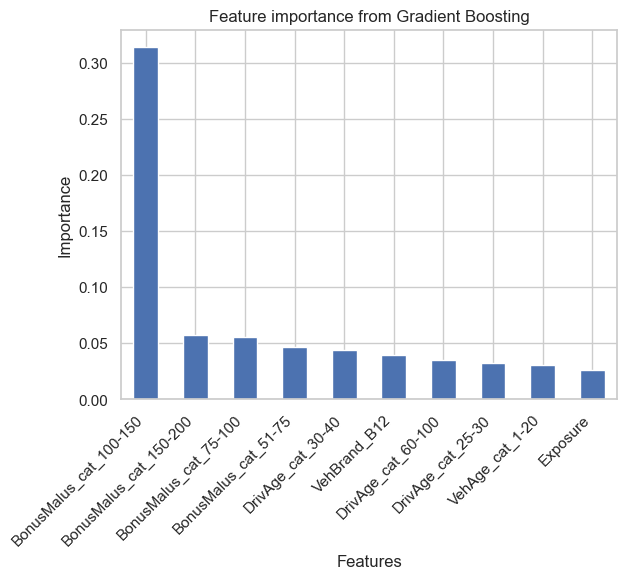

In [119]:
# Plot the feature importances
importance_df.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature importance from Gradient Boosting')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.show()

The function ```plot_importance(xgb_model)``` can also graphically represent feature importance for all variables. ```importance_type``` support different methods such as 'weight', 'gain', and 'cover'.

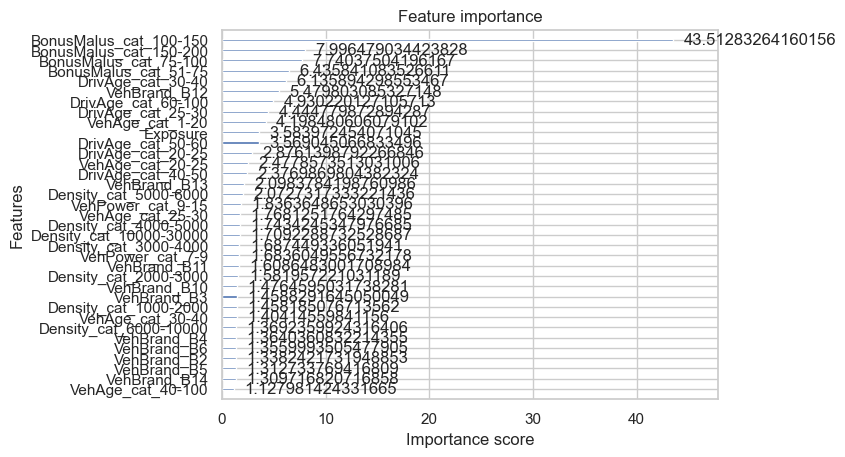

In [120]:
xgb.plot_importance(xgb_model,importance_type='gain')
plt.show()

<ins>**Generalized linear model with a Poisson distribution**</ins><br />
Afterwards, a poisson distribution is used for the generalized linear model. The target feature is *ClaimNb* and variable *Exposure* is also taken into consideration. Further information is available in session 2.

In [137]:
# Fit the glm poisson model
glm_poisson_model = sm.formula.glm("ClaimNb ~ VehAge_cat + DrivAge_cat + BonusMalus_cat + VehPower_cat + VehBrand + Density_cat", \
                              data = GLM_train, family=sm.families.Poisson(link=sm.families.links.Log()), offset = np.log(GLM_train['Exposure'])).fit()

Once both models are fitted, they can predict the number of claims for observations from the test dataset.

In [ ]:
# Evaluate the models
glm_predictions = glm_poisson_model.predict(X_val)
xgb_predictions = xgb_model.predict(X_val_encoded)

## 6.4 Model Evaluation<a name="Ex2_model_evaluation"></a>    
This function shows a comparison between the actual values observed, the predicted values from the GLM model, and the predicted values from the gradient boosting model split for a given variable.

In [139]:
def show_graph(X_test,y_test,glm_predictions,xgb_predictions,var_cat,labels):
    # Calculate mean predictions by category for Poisson GLM
    yhat_mean_poisson = glm_predictions.groupby(X_test[var_cat], observed=True).mean()
    # Converting predictions to DataFrame to group by category
    yhat_mean_xgb = pd.DataFrame({var_cat: X_test[var_cat], 'xgb_pred': xgb_predictions}).groupby(var_cat, observed=True).mean()
    # Create x-axis
    x_values = []
    for i in range(len(labels)):
        a, b = map(int, labels[i].split('-'))
        midpoint = (a + b) / 2
        x_values.append(midpoint)
    # Plot predicted values from Poisson GLM in blue
    plt.scatter(x_values, yhat_mean_poisson, color='blue', label='Poisson Predicted')
    # Plot predicted values from XGBoost in green
    plt.scatter(x_values, yhat_mean_xgb, color='green', label='XGBoost Predicted')
    # Plot actual values in orange
    actual_means = y_test.groupby(X_test[var_cat], observed=True).mean()
    plt.scatter(x_values, actual_means, color='orange', label='Actual Values')
    plt.xlabel(var_cat)
    plt.ylabel('Number of claims')
    plt.title('Predicted vs real number of Claims')
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

In [140]:
def show_combined_graphs(X_test, y_test, glm_predictions, xgb_predictions, labels_dict):

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    
    for idx, (var_cat, labels) in enumerate(labels_dict.items()):
        # Calculate mean predictions by category for Poisson GLM
        yhat_mean_poisson = glm_predictions.groupby(X_test[var_cat], observed=True).mean()
        
        # Converting predictions to DataFrame to group by category
        yhat_mean_xgb = pd.DataFrame({var_cat: X_test[var_cat], 'xgb_pred': xgb_predictions}).groupby(var_cat, observed=True).mean()
        
        # Create x-axis
        x_values = []
        for label in labels:
            a, b = map(int, label.split('-'))
            midpoint = (a + b) / 2
            x_values.append(midpoint)
        
        # Plot predicted values from Poisson GLM
        axes[idx].scatter(x_values, yhat_mean_poisson, color='blue', label='Poisson Predicted')
        
        # Plot predicted values from XGBoost
        axes[idx].scatter(x_values, yhat_mean_xgb, color='green', label='XGBoost Predicted')
        
        # Plot actual values
        actual_means = y_test.groupby(X_test[var_cat], observed=True).mean()
        axes[idx].scatter(x_values, actual_means, color='orange', label='Actual Values')
        
        axes[idx].set_xlabel(var_cat)
        axes[idx].set_title(f'Predicted vs Real number of Claims for {var_cat}')
        
    axes[0].set_ylabel('Number of claims')
    axes[0].legend(loc='upper right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

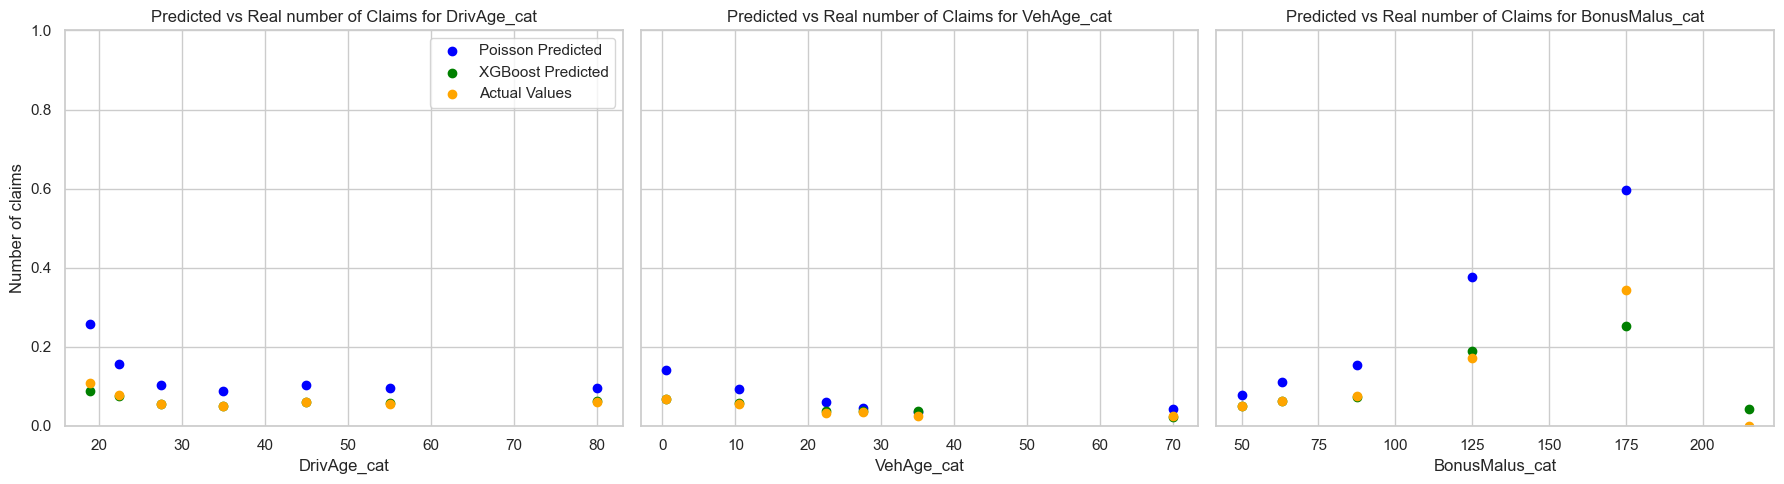

In [125]:
labels_dict = {
    'DrivAge_cat': labelsDrivAge,
    'VehAge_cat': labelsVehAge,
    'BonusMalus_cat': ['50-50', '51-75', '75-100', '100-150', '150-200', '200-230']
}

show_combined_graphs(X_test, y_test, glm_predictions, xgb_predictions, labels_dict)

As seen above, the XGboost model performs very well against a glm Poisson model. While the latter could be fine-tuned for better performance, the XGboost algorithm is already very effective without further tweaks.

## 6.5 Selection number of iterations & learning rate<a name="selection_number_of_iterations"></a>
<ins>**Number of iterations**</ins><br />
Selecting the right number of iterations is important to avoid overfitting. As the model continues to fit better on the training dataset, the MSE on the validation dataset typically decreases with additional iterations. However, after a certain point, the model stops gaining useful information and starts to overfit, leading to an increase in the MSE on the validation set.

In [142]:
# Define a range of iterations to test
iterations = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 35, 40, 50, 60, 70, 80, 90, 100, 120, 150, 170, 200, 300, 500,1000]

# Lists to store errors
train_errors = []
val_errors = []

for n in iterations:
    # Initialize and train the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='count:poisson', eval_metric='rmse', seed=42, n_estimators=n)
    xgb_model.fit(X_train_encoded, y_train)
    
    # Make predictions
    y_train_pred = xgb_model.predict(X_train_encoded)
    y_val_pred = xgb_model.predict(X_val_encoded)
    
    # Calculate MSE for train and validation sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_test, y_val_pred)
    
    # Append errors to lists
    train_errors.append(train_mse)
    val_errors.append(val_mse)

# Find the index of the minimum validation error
min_val_error_index = val_errors.index(min(val_errors))
min_val_iteration = iterations[min_val_error_index]

KeyboardInterrupt: 

This is illustrated below. The mean squared error is calculated for both the training and validation datasets using a default learning rate of 0.3. A vertical dotted line indicates the iteration at which the minimum validation MSE occurs (60 iterations).

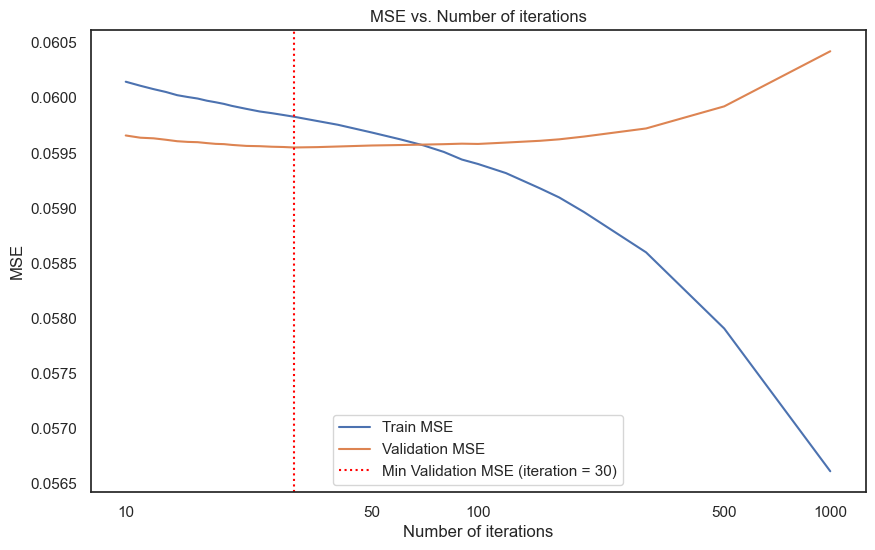

In [129]:
custom_ticks = [10, 50, 100, 500, 1000]

# Plot the errors
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_errors, label='Train MSE')
plt.plot(iterations, val_errors, label='Validation MSE')
plt.axvline(x=min_val_iteration, color='red', linestyle='dotted', label=f'Min Validation MSE (iteration = {min_val_iteration})')
plt.xscale('log')
plt.xticks(custom_ticks, labels=[str(tick) for tick in custom_ticks])
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.title('MSE vs. Number of iterations')
plt.legend()
plt.grid(False)
plt.show()

For the current learning rate, the graph shows that MSE does not decrease further for the validation set after 60 iterations. <br /><br />
<ins>**Learning rate**</ins><br />
The learning rate (or shrinkage factor) covered in section [2.3](#boost_alg) aims to prevent overfitting by slowing down the learning process, which helps avoid fitting noise in the data. Consequently, while a lower learning rate is expected to result in a decrease in MSE on the validation dataset, it typically requires more iterations to achieve this improvement. A learning rate must be greater than 0 and up to 1, though values between 0.01 and 0.3 are commonly used. 

Let's observe this evolution by comparing the MSE for different numbers of iterations and learning rates.

In [130]:
# Define a range of iterations (n_estimators) to test
iterations = [10, 20, 30, 40, 50, 75, 100, 200, 500, 1000]
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]

# Dictionary to store errors for each learning rate
errors = {lr: [] for lr in learning_rates}

for lr in learning_rates:
    for n in iterations:
        # Initialize and train the XGBoost model
        xgb_model = xgb.XGBRegressor(
            objective='count:poisson',
            eval_metric='rmse',
            seed=42,
            n_estimators=n,
            learning_rate=lr
        )
        xgb_model.fit(X_train_encoded, y_train)

        # Make predictions
        y_val_pred = xgb_model.predict(X_val_encoded)

        # Calculate MSE for the validation set
        val_mse = mean_squared_error(y_test, y_val_pred)

        # Append validation MSE to the list for the current learning rate
        errors[lr].append(val_mse)

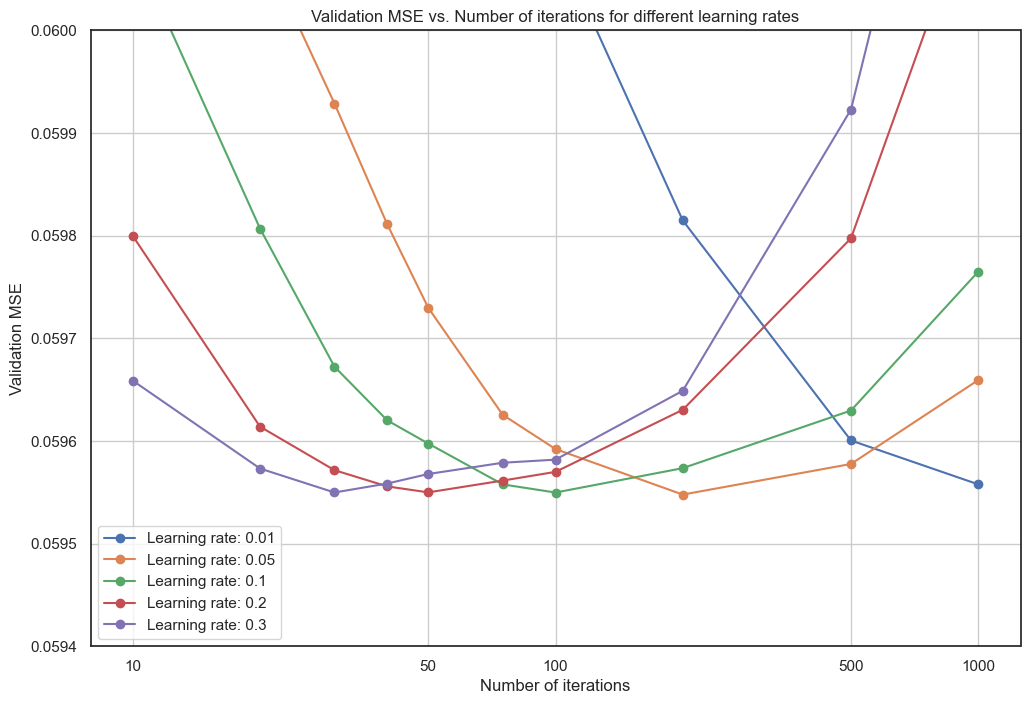

In [131]:
# Plot the results
plt.figure(figsize=(12, 8))
for lr, val_errors in errors.items():
    plt.plot(iterations, val_errors, marker='o', label=f'Learning rate: {lr}')

plt.xlabel('Number of iterations')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs. Number of iterations for different learning rates')
plt.xscale('log')
plt.xticks([10, 50, 100, 500, 1000], labels=[str(tick) for tick in [10, 50, 100, 500, 1000]])
plt.legend()
plt.ylim(0.0594, 0.06) # this line can be commented to see the bigger picture
plt.grid(True)
plt.show()

Two effects are visible:
- The model achieves lower validation error more quickly with a higher learning rate
- A higher learning rate can lead to faster overfitting

Given that MSE does not substantially improve for a smaller learning rate, selecting a particularly low learning rate may be inefficient, as it requires extra iterations without significant gains. 

## 6.7 Regularization<a name="regularization"></a>
Regularization covered in session 6 from module 1, can also be implemented with package ```xgboost```. To briefly summarize, regularization is a technique used to avoid overfitting by adding a penalty to the loss function. Consequently, models with more parameters will fare comparatively worse if they are overly complex.<br /><br />
<ins>**L1 Regularization (Lasso)**</ins><br />

$$\min \sum_{i \in \mathcal{I}} L\left(y_i, \hat{\mu}_{t-1}\left(x_i\right)+\beta_{t, \mathbf{a}_t} h\left(x_i ; \mathbf{a}_t\right)\right) +\lambda \sum_{j=1}^p |\beta_{t,\mathbf{a}_t,j}|$$

<ins>**L2 Regularization (Ridge)**</ins><br />

$$\min \sum_{i \in \mathcal{I}} L\left(y_i, \hat{\mu}_{t-1}\left(x_i\right)+\beta_{t, \mathbf{a}_t} h\left(x_i ; \mathbf{a}_t\right)\right) +\lambda \sum_{j=1}^p \beta_{t,\mathbf{a}_t,j}^2$$

Parameters $\beta_j$ (with $0<j<p$) are coefficients used to fit function $h(x_i ; \mathbf{a}_t))$. With package ```xgboost```, the regularization strength for L1 is controlled by the ```alpha``` parameter while for L2, it is controlled by the ```lambda``` parameter.

An example showing the evolution of MSE is presented next, comparing a standard XGBoost model with a similar model that includes L1 regularization. This comparison will highlight the impact of L1 regularization on model performance.

In [132]:
iterations = [10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000]

# Exemple of L1
# Initialize lists to store MSE results
mse_standard_train = []
mse_standard_val = []
mse_l1_train = []
mse_l1_val = []

# Compare models for different numbers of iterations
for n_iter in iterations:
    # Standard model
    xgb_standard = xgb.XGBRegressor(objective='count:poisson', eval_metric='rmse', seed=42, n_estimators=n_iter)
    xgb_standard.fit(X_train_encoded, y_train)
    y_train_pred_standard = xgb_standard.predict(X_train_encoded)
    y_val_pred_standard = xgb_standard.predict(X_val_encoded)
    
    mse_standard_train.append(mean_squared_error(y_train, y_train_pred_standard))
    mse_standard_val.append(mean_squared_error(y_test, y_val_pred_standard))
    
    # Model with L1 regularization
    xgb_l1 = xgb.XGBRegressor(objective='count:poisson', eval_metric='rmse', seed=42, n_estimators=n_iter, alpha=10)
    xgb_l1.fit(X_train_encoded, y_train)
    y_train_pred_l1 = xgb_l1.predict(X_train_encoded)
    y_val_pred_l1 = xgb_l1.predict(X_val_encoded)
    
    mse_l1_train.append(mean_squared_error(y_train, y_train_pred_l1))
    mse_l1_val.append(mean_squared_error(y_test, y_val_pred_l1))

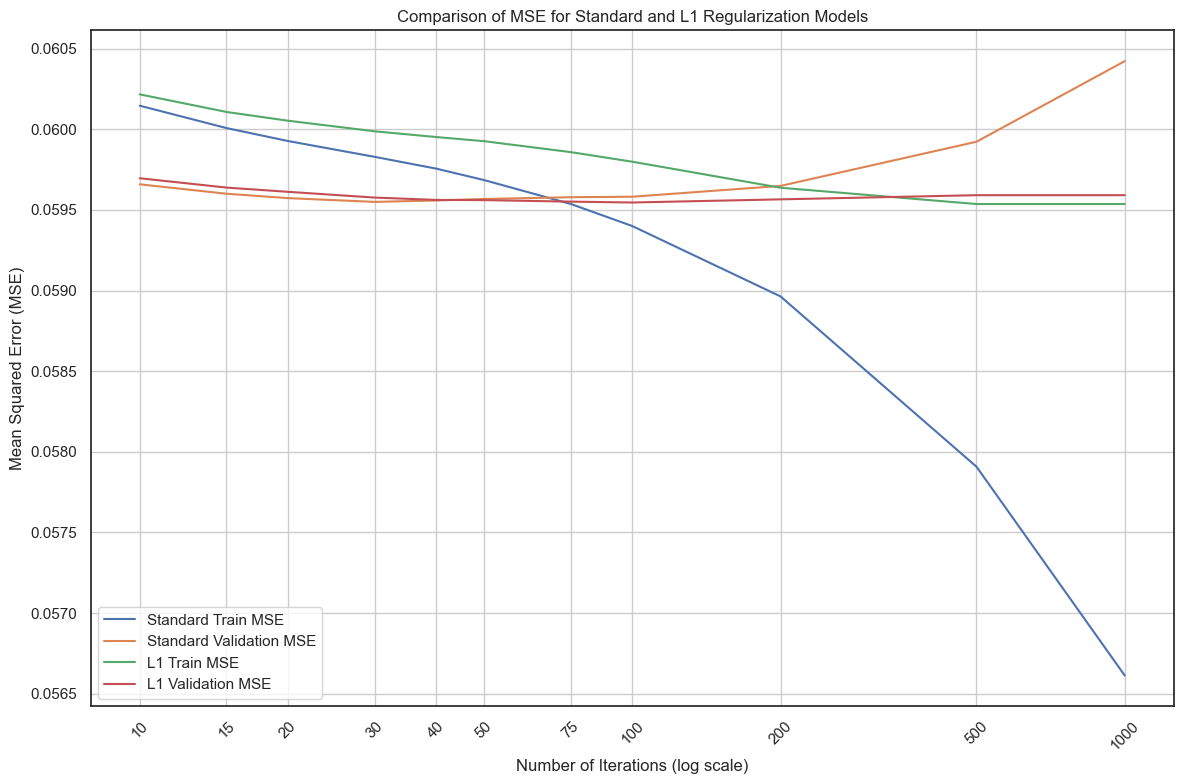

In [133]:
custom_ticks = [10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000]
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(iterations, mse_standard_train, label='Standard Train MSE')
plt.plot(iterations, mse_standard_val, label='Standard Validation MSE')
plt.plot(iterations, mse_l1_train, label='L1 Train MSE')
plt.plot(iterations, mse_l1_val, label='L1 Validation MSE')

plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Standard and L1 Regularization Models')
plt.xticks(custom_ticks, labels=[str(i) for i in custom_ticks], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The MSE from the standard model on the training dataset continues to decrease with additional iterations, while the MSE on the validation dataset progressively increases, indicating overfitting. Comparatively, the MSE from the model with Lasso regularization is higher for the training dataset, but the MSE on the validation dataset remains stable with additional iterations. This demonstrates that the model with Lasso regularization is less prone to overfitting than the standard model, as it keeps consistent performance on a validation dataset despite having a higher training error.

## 6.8 Algorithm efficiency<a name="algorithm_efficiency"></a>

We previously observed that standard XGboost algorithms implemented with ```sklearn``` and ```xgboost``` offer comparable results. Nevertheless, given that boosting methods can be computationally intensive, it is also important to assess the efficiency of the dedicated functions.

Let us compare the time it takes to fit the model and predict the target variable on a validation dataset for different numbers of iterations.  

In [143]:
# List of iterations to evaluate
iterations = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store execution time results
time_xgb_val = []
time_sklearn_val = []

# Compare models for different numbers of iterations
for n_iter in iterations:
    # XGBoost Model
    start_time = time.time()
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.3, eval_metric='rmse', seed=42, n_estimators=n_iter)
    xgb_model.fit(X_train_encoded, y_train)
    end_time = time.time()
    time_xgb_val.append(end_time - start_time)
    
    # Equivalent scikit-learn Gradient Boosting Model
    start_time = time.time()
    sklearn_model = GradientBoostingRegressor(loss='squared_error', learning_rate=0.3, n_estimators=n_iter, random_state=42)
    sklearn_model.fit(X_train_encoded, y_train)
    end_time = time.time()
    time_sklearn_val.append(end_time - start_time)

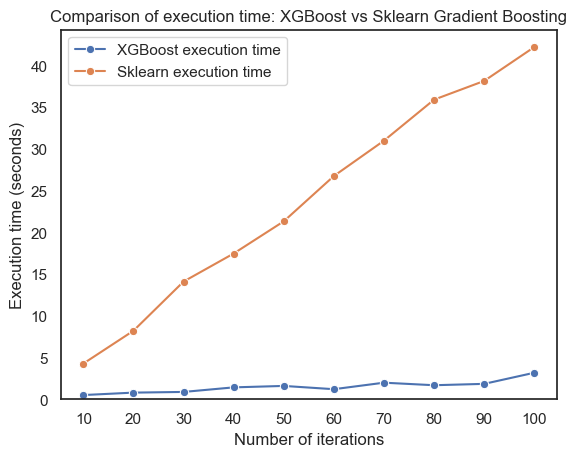

In [144]:
sns.lineplot(x=iterations, y=time_xgb_val, label='XGBoost execution time', marker='o')
sns.lineplot(x=iterations, y=time_sklearn_val, label='Sklearn execution time', marker='o')

plt.xlabel('Number of iterations')
plt.ylabel('Execution time (seconds)')
plt.title('Comparison of execution time: XGBoost vs Sklearn Gradient Boosting')
plt.xticks(iterations, labels=[str(i) for i in iterations])
plt.ylim(0)  # Ensure y-axis starts at 0
plt.legend()
plt.grid(False)  # Disable grid

plt.show()

Compared to ```sklearn```, package ```xgboost``` appears to be significantly better optimized for performing gradient boosting algorithms. Moreover, performance can be further optimized by fine-tuning specific parameters and options available (see documentation online).

# 7. Summary <a name="summary"></a>
During this session, boosted methods have been introduced:

- The main elements from the theoretical session were briefly discussed, with explanations of boosting algorithms, notably AdaBoost and Gradient Boosting.<br /><br />

- A first dataset on fraud claims was used to demonstrate how boosting algorithms are implemented in Python. After conducting exploratory analysis and data cleaning, a random forest model was compared with different boosted models. The model was then fine-tuned to improve the accuracy of fraud detection.<br /><br />

- A second dataset on claims frequency was used to compare a GLM model with a gradient boosting algorithm. Key concepts discussed included feature importances, the impact of the number of iterations, adjusting the learning rate for optimal performance, evaluating algorithm efficiency, and applying regularization to prevent overfitting.